# Case Study 1

#### Predicting Central Neuropathic Pain (CNP) in people with Spinal Cord Injury (SCI) from Electroencephalogram (EEG) data.

* CNP is pain in response to non-painful stimuli, episodic (electric shock), “pins and needles”, numbness
* There is currently no treatment, only prevention
* Preventative medications have strong side-effects
* Predicting whether a patient is likely to develop pain is useful for selective treatment

#### Task
Your task is to devise a feature engineering strategy which, in combination with a classifier of your choice, optizimes prediction accuracy.

#### Data
The data is preprocessed brain EEG data from SCI patients recorded while resting with eyes closed (EC) and eyes opened (EO).
* 48 electrodes recording electrical activity of the brain at 250 Hz 
* 2 classes: subject will / will not develop neuropathic pain within 6 months
* 18 subjects: 10 developed pain and 8 didn’t develop pain
* the data has already undergone some preprocessing
  * Signal denoising and normalization
  * Temporal segmentation
  * Frequency band power estimation
  * Normalization with respect to total band power
  * Features include normalized alpha, beta, theta band power while eyes closed, eyes opened, and taking the ratio of eo/ec.
* the data is provided in a single table ('data.csv') consisting of 
  * 180 rows (18 subjects x 10 repetitions), each containing
  * 432 columns (9 features x 48 electrodes)
  * rows are in subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
  * columns are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
  * feature identifiers for all columns are stored in 'feature_names.csv'
  * 'labels.csv' defines the corresponding class (0 or 1) to each row in data.csv

#### Objective Measure
Leave one subject out cross-validation accuracy, sensitivity and specificity.

#### Report
Report on your feature engineering pipeline, the classifier used to evaluate performance, and the performance as mean and standard deviation of accuracy, sensitivity and specificity across folds. Give evidence for why your strategy is better than others.




In [1]:
import csv
import numpy as np

from matplotlib import pyplot as plt

In [2]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('data.csv', delimiter=',') 
y = np.loadtxt('labels.csv', delimiter=',')

print("Total Results: \n\n", y,"\n\n")

xx= np.where(y == 0)


print("Total One's: \n\n", np.count_nonzero(y),"\n\n")
print("Total Zeroes: \n\n", len(xx[0]))


with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]

Total Results: 

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 


Total One's: 

 80 


Total Zeroes: 

 100


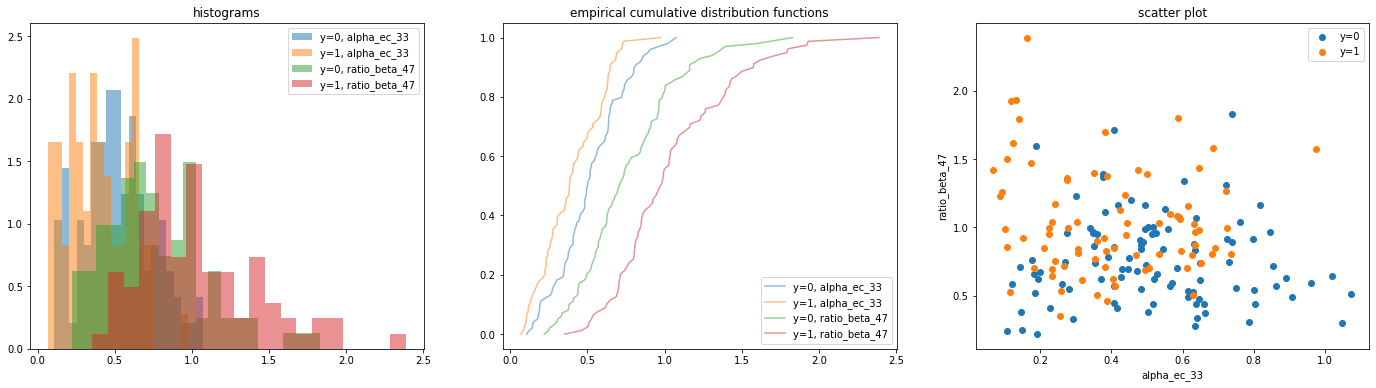

In [3]:
# plotting data in 2D with axes sampled 
# a) at random 
# b) from same electrode
# c) from same feature type
num_features = 9
num_electrodes = 48

# a) indices drawn at random
i0, i1 = np.random.randint(0, X.shape[1], size=2)

# b) same electrode, different feature (uncomment lines below)
#f0, f1 = np.random.randint(0, num_features, size=2)
#e = np.random.randint(0, num_electrodes)
#i0, i1 = f0*num_electrodes + e, f1*num_electrodes + e

# b) same feature, different electrode (uncomment lines below)
#f = np.random.randint(0, num_features)
#e0, e1 = np.random.randint(0, num_electrodes, size=2)
#i0, i1 = f*num_electrodes + e0, f*num_electrodes + e1

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
colors = ['blue', 'red']

# select features i0, i1 and separate by class
X00, X01 = X[y==0][:,i0], X[y==1][:,i0]
X10, X11 = X[y==0][:,i1], X[y==1][:,i1]
# plot cumulative distribution of feature i0 separate for each class
axes[0].hist(X00, bins=20, label='y=0, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X01, bins=20, label='y=1, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X10, bins=20, label='y=0, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].hist(X11, bins=20, label='y=1, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].set_title('histograms')
axes[0].legend()
axes[1].plot(np.sort(X00), np.linspace(0,1,X00.shape[0]), label='y=0, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X01), np.linspace(0,1,X01.shape[0]), label='y=1, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X10), np.linspace(0,1,X10.shape[0]), label='y=0, '+ feature_names[i1], alpha=0.5)
axes[1].plot(np.sort(X11), np.linspace(0,1,X11.shape[0]), label='y=1, '+ feature_names[i1], alpha=0.5)
axes[1].set_title('empirical cumulative distribution functions')
axes[1].legend()
axes[2].scatter(X00, X10, label='y=0')
axes[2].scatter(X01, X11, label='y=1')
axes[2].set_xlabel(feature_names[i0])
axes[2].set_ylabel(feature_names[i1])
axes[2].set_title('scatter plot')
axes[2].legend()

In [4]:
# All Important Libraries Import

import math
import warnings
import pandas as pd
from numpy import std
from numpy import mean
import sklearn.exceptions
from sklearn import metrics
from sklearn.svm import SVC
from matplotlib import pyplot
%matplotlib inline
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

# Without Feature Selection

## Classifier: SVM

In [5]:
y_true, y_pred = list(), list()

kf = KFold(n_splits=18, random_state=None, shuffle=False) # For Cross Validation

model = SVC(kernel='linear', C=1, random_state=40) # Declaring Model

#specificity = make_scorer(recall_score, pos_label=0)

#specificity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring=specificity)

print("Individual Subjects' Performance Report")

i = 0
TP = 0
FP = 0
TN = 0
FN = 0

for train_index, test_index in kf.split(X):
    

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    
    model.fit(X_train, y_train)
    result = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(result)
    
    
    print("\nSubject No : ", i+1)
    
    #print(classification_report(y_test, result, target_names=None))

    print("Accuracy", metrics.accuracy_score(y_test, result))
    
    #print("Sensitivity for Subject is", metrics.recall_score(y_test, result))
    
    #print("Specificity for Subject is", specificity_with_no_feature_selection[i],"\n") 
    
    for j in range(len(y_test)):
        
        if y_test[j] == result[j] == 1:
            TP += 1
        
        if result[j]==1 and y_test[j]!=result[j]:
            FP += 1
        
        if y_test[j]==result[j]==0:
            TN += 1
        
        if result[j]==0 and y_test[j]!=result[j]:
            FN += 1
    
    
    
    
    i=i+1
    
#print(y_true)
#print(y_pred)

    
accuracy_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring='accuracy')

#sensitivity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring='recall')

#print(accuracy,"\n")
#print(sensitivity,"\n")
#print(specificity,"\n")

    
# report performance

print("\n\nOverall Performance Report \n")
print('Accuracy Mean:', (mean(accuracy_with_no_feature_selection)))
print('Accuracy Standard Deviation:', (std(accuracy_with_no_feature_selection)), '\n')

#print('Sensitivity Mean:', (mean(sensitivity_with_no_feature_selection)))
#print('Sensitivity Standard Deviation:', (std(sensitivity_with_no_feature_selection)), '\n')

#print('Specificity Mean:', (mean(specificity_with_no_feature_selection)))
#print('Specificity Standard Deviation:', (std(specificity_with_no_feature_selection)), '\n')

sensitivity_with_no_feature_selection = TP / (TP + FN)

print('Sensitivity:', sensitivity_with_no_feature_selection)

specificity_with_no_feature_selection = TN / (TN + FP)

print('Specificity:', specificity_with_no_feature_selection)




Individual Subjects' Performance Report

Subject No :  1
Accuracy 0.7

Subject No :  2
Accuracy 0.9

Subject No :  3
Accuracy 0.9

Subject No :  4
Accuracy 1.0

Subject No :  5
Accuracy 1.0

Subject No :  6
Accuracy 0.9

Subject No :  7
Accuracy 0.9

Subject No :  8
Accuracy 0.8

Subject No :  9
Accuracy 1.0

Subject No :  10
Accuracy 0.9

Subject No :  11
Accuracy 1.0

Subject No :  12
Accuracy 0.7

Subject No :  13
Accuracy 0.8

Subject No :  14
Accuracy 1.0

Subject No :  15
Accuracy 0.9

Subject No :  16
Accuracy 0.7

Subject No :  17
Accuracy 0.8

Subject No :  18
Accuracy 0.8


Overall Performance Report 

Accuracy Mean: 0.8722222222222222
Accuracy Standard Deviation: 0.10437941237808855 

Sensitivity: 0.8375
Specificity: 0.9


## Classifier: Logistic Regression

In [6]:
y_true, y_pred = list(), list()

kf = KFold(n_splits=18, random_state=None, shuffle=False) # For Cross Validation

model = SVC(kernel='linear', C=1, random_state=40) # Declaring Model

model = LogisticRegression(solver='liblinear', random_state=0)

#specificity = make_scorer(recall_score, pos_label=0)

#specificity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring=specificity)

print("Individual Subjects' Performance Report")

i = 0
TP = 0
FP = 0
TN = 0
FN = 0

for train_index, test_index in kf.split(X):
    

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    
    model.fit(X_train, y_train)
    result = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(result)
    
    
    print("\nSubject No : ", i+1)
    
    #print(classification_report(y_test, result, target_names=None))

    print("Accuracy", metrics.accuracy_score(y_test, result))
    
    #print("Sensitivity for Subject is", metrics.recall_score(y_test, result))
    
    #print("Specificity for Subject is", specificity_with_no_feature_selection[i],"\n") 
    
    for j in range(len(y_test)):
        
        if y_test[j] == result[j] == 1:
            TP += 1
        
        if result[j]==1 and y_test[j]!=result[j]:
            FP += 1
        
        if y_test[j]==result[j]==0:
            TN += 1
        
        if result[j]==0 and y_test[j]!=result[j]:
            FN += 1
    
    
    
    
    i=i+1
    
#print(y_true)
#print(y_pred)

    
accuracy_lr = cross_val_score(model, X, y, cv = kf, scoring='accuracy')

#sensitivity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring='recall')

#print(accuracy,"\n")
#print(sensitivity,"\n")
#print(specificity,"\n")

    
# report performance

print("\n\nOverall Performance Report \n")
print('Accuracy Mean:', (mean(accuracy_lr)))
print('Accuracy Standard Deviation:', (std(accuracy_lr)), '\n')

#print('Sensitivity Mean:', (mean(sensitivity_with_no_feature_selection)))
#print('Sensitivity Standard Deviation:', (std(sensitivity_with_no_feature_selection)), '\n')

#print('Specificity Mean:', (mean(specificity_with_no_feature_selection)))
#print('Specificity Standard Deviation:', (std(specificity_with_no_feature_selection)), '\n')

sensitivity_lr = TP / (TP + FN)

print('Sensitivity:', sensitivity_lr)

specificity_lr = TN / (TN + FP)

print('Specificity:', specificity_lr)




Individual Subjects' Performance Report

Subject No :  1
Accuracy 0.6

Subject No :  2
Accuracy 1.0

Subject No :  3
Accuracy 0.9

Subject No :  4
Accuracy 0.9

Subject No :  5
Accuracy 0.9

Subject No :  6
Accuracy 1.0

Subject No :  7
Accuracy 0.8

Subject No :  8
Accuracy 0.8

Subject No :  9
Accuracy 1.0

Subject No :  10
Accuracy 0.9

Subject No :  11
Accuracy 1.0

Subject No :  12
Accuracy 0.7

Subject No :  13
Accuracy 0.9

Subject No :  14
Accuracy 0.9

Subject No :  15
Accuracy 0.9

Subject No :  16
Accuracy 0.6

Subject No :  17
Accuracy 0.9

Subject No :  18
Accuracy 0.8


Overall Performance Report 

Accuracy Mean: 0.8611111111111112
Accuracy Standard Deviation: 0.1208253509496197 

Sensitivity: 0.8375
Specificity: 0.88


## Performance Comparison Between SVM and LR

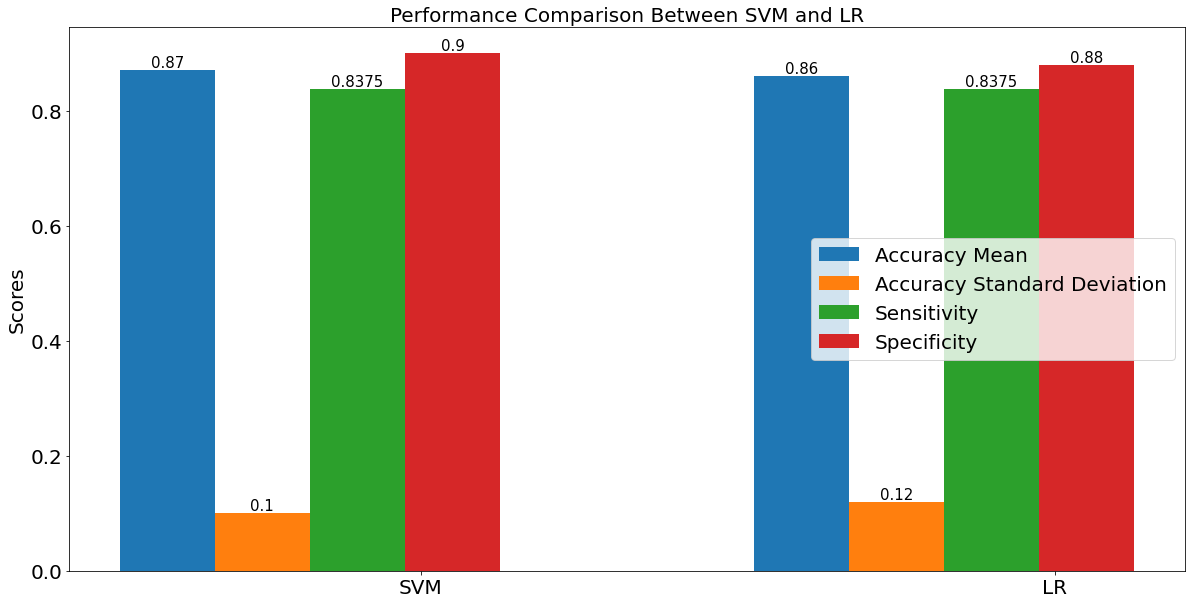

In [7]:
accuracy_mean_list = [round((mean(accuracy_with_no_feature_selection)),2), round((mean(accuracy_lr)),2)]
accuracy_std_list = [round((std(accuracy_with_no_feature_selection)),2), round((std(accuracy_lr)),2)]
sensitivity_list = [sensitivity_with_no_feature_selection, sensitivity_lr]
specificty_list = [specificity_with_no_feature_selection, specificity_lr]

y_data = [accuracy_mean_list, accuracy_std_list, sensitivity_list, specificty_list]

data_label = ["Accuracy Mean", "Accuracy Standard Deviation", "Sensitivity", "Specificity"]

plt.figure(figsize=(20, 10))


for i in range(4):
    plt.bar(np.array([1,2])+i*0.15, y_data[i], width=0.15, label=data_label[i])
    for a,b in zip(np.array([1,2,3,4]),y_data[i]):
        plt.text(a+i*0.15,b,'%s' % b,ha = 'center',va = 'bottom',fontsize=15)


# for a,b in zip(range(len(x_range_com)),y_range_com):
#     plt.text(a,b,'%s' % b,ha = 'center',va = 'bottom',fontsize=18)
        
plt.legend(loc=5, fontsize=20)

plt.title("Performance Comparison Between SVM and LR", fontsize=20)

plt.xticks((1.4,2.4),("SVM","LR"))

plt.ylabel("Scores", fontsize = 20)

plt.tick_params(labelsize=20)

plt.show()

# Feature Selection

## Filtering Method: ANOVA

In [8]:
#Commented code below gives us the information that whichK Value works the best

# def evaluate_model(model, X, y):

#     scores = cross_val_score(model, X, y, cv = kf, scoring='accuracy')

#     return scores


# num_features = [i+1 for i in range(X.shape[1])]

# results = list()


# for k in num_features:


#     fs = SelectKBest(f_classif, k=k)

#     pipeline = Pipeline(steps=[('anova',fs), ('SVC', model)])

#     scores = evaluate_model(pipeline, X, y)

#     results.append(scores)

#     print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))


fs = SelectKBest(f_classif, k=179)

X_kbest = fs.fit_transform(X, y) # Removes the unnecessary features from Original X

#K Best Values 179, 180

y_true, y_pred = list(), list()

kf = KFold(n_splits=18, random_state=None, shuffle=False) # For Cross Validation

model = SVC(kernel='linear', C=1, random_state=40) # Declaring Model

#specificity = make_scorer(recall_score, pos_label=0)

#specificity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring=specificity)

print("Individual Subjects' Performance Report")

i = 0
TP = 0
FP = 0
TN = 0
FN = 0

for train_index, test_index in kf.split(X_kbest):
    

    X_train, X_test = X_kbest[train_index], X_kbest[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    
    model.fit(X_train, y_train)
    result = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(result)
    
    
    print("\nSubject No : ", i+1)
    
    #print(classification_report(y_test, result, target_names=None))

    print("Accuracy", metrics.accuracy_score(y_test, result))
    
    #print("Sensitivity for Subject is", metrics.recall_score(y_test, result))
    
    #print("Specificity for Subject is", specificity_with_no_feature_selection[i],"\n") 
    
    for j in range(len(y_test)):
        
        if y_test[j] == result[j] == 1:
            TP += 1
        
        if result[j]==1 and y_test[j]!=result[j]:
            FP += 1
        
        if y_test[j]==result[j]==0:
            TN += 1
        
        if result[j]==0 and y_test[j]!=result[j]:
            FN += 1
    
    i=i+1
    
#print(y_true)
#print(y_pred)

    
accuracy_with_anova = cross_val_score(model, X_kbest, y, cv = kf, scoring='accuracy')

#sensitivity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring='recall')

#print(accuracy,"\n")
#print(sensitivity,"\n")
#print(specificity,"\n")

    
# report performance

print("\n\nOverall Performance Report \n")
print('Accuracy Mean:', (mean(accuracy_with_anova)))
print('Accuracy Standard Deviation:', (std(accuracy_with_anova)), '\n')

#print('Sensitivity Mean:', (mean(sensitivity_with_no_feature_selection)))
#print('Sensitivity Standard Deviation:', (std(sensitivity_with_no_feature_selection)), '\n')

#print('Specificity Mean:', (mean(specificity_with_no_feature_selection)))
#print('Specificity Standard Deviation:', (std(specificity_with_no_feature_selection)), '\n')

sensitivity_with_anova = TP / (TP + FN)

print('Sensitivity:', sensitivity_with_anova)

specificity_with_anova = TN / (TN + FP)

print('Specificity:', specificity_with_anova)



Individual Subjects' Performance Report

Subject No :  1
Accuracy 0.7

Subject No :  2
Accuracy 1.0

Subject No :  3
Accuracy 1.0

Subject No :  4
Accuracy 0.9

Subject No :  5
Accuracy 1.0

Subject No :  6
Accuracy 0.9

Subject No :  7
Accuracy 0.9

Subject No :  8
Accuracy 0.9

Subject No :  9
Accuracy 1.0

Subject No :  10
Accuracy 0.8

Subject No :  11
Accuracy 1.0

Subject No :  12
Accuracy 0.9

Subject No :  13
Accuracy 1.0

Subject No :  14
Accuracy 1.0

Subject No :  15
Accuracy 1.0

Subject No :  16
Accuracy 0.6

Subject No :  17
Accuracy 0.8

Subject No :  18
Accuracy 0.9


Overall Performance Report 

Accuracy Mean: 0.9055555555555556
Accuracy Standard Deviation: 0.11290223018278653 

Sensitivity: 0.9
Specificity: 0.91


## ANOVA Performance Report

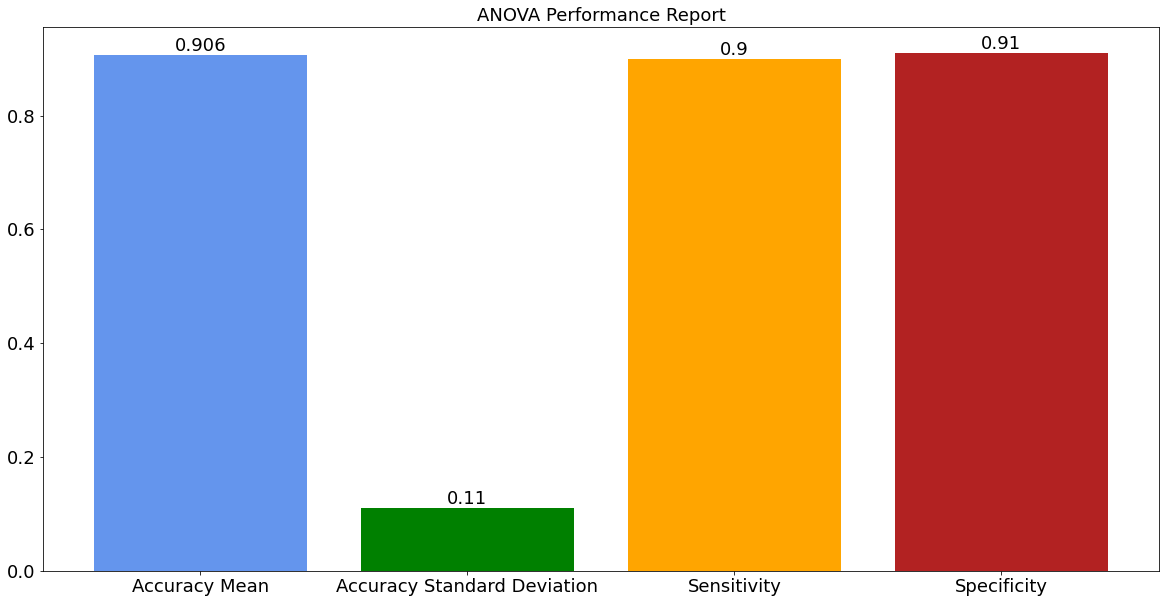

In [9]:

plt.figure(figsize=(20, 10))

accuracy_with_anova_mean = (mean(accuracy_with_anova))

accuracy_with_anova_std = (std(accuracy_with_anova))

accuracy_with_anova_mean = round(accuracy_with_anova_mean,3)

accuracy_with_anova_std = round(accuracy_with_anova_std,2)

x_com = ("Accuracy Mean", "Accuracy Standard Deviation", "Sensitivity", "Specificity")
y_com = [accuracy_with_anova_mean, accuracy_with_anova_std, sensitivity_with_anova, specificity_with_anova]

plt.bar(x_com, y_com, color=["cornflowerblue","g", "orange", "firebrick"])

plt.tick_params(labelsize=18)

plt.title("ANOVA Performance Report", fontsize=18)

for a,b in zip(range(len(x_com)),y_com):
    plt.text(a,b,'%s' % b,ha = 'center',va = 'bottom',fontsize=18)
    
plt.show()

## Wrapper Method: Recursive Feature Elimination

Optimal number of features: 322


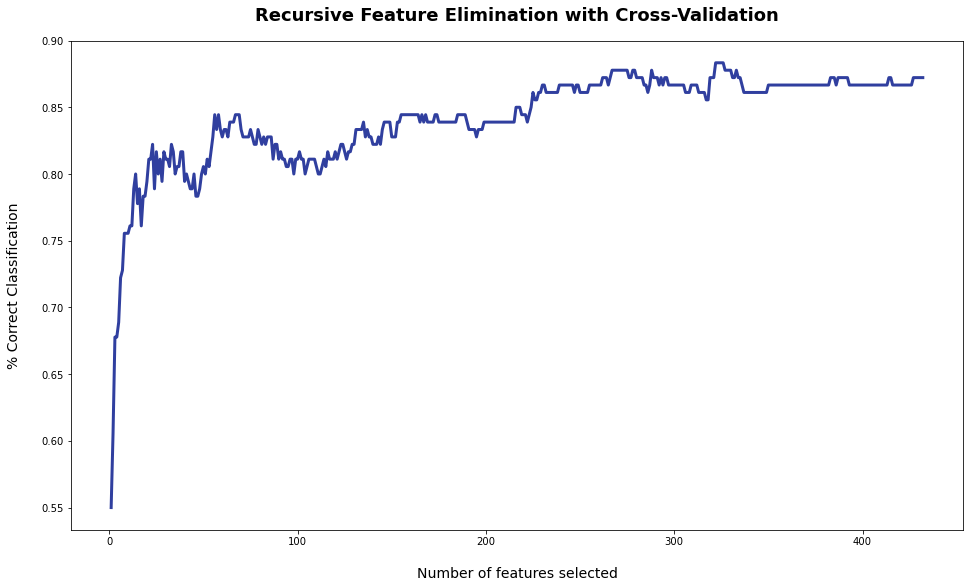

Individual Subjects' Performance Report

Subject No :  1
Accuracy 0.8

Subject No :  2
Accuracy 1.0

Subject No :  3
Accuracy 1.0

Subject No :  4
Accuracy 1.0

Subject No :  5
Accuracy 1.0

Subject No :  6
Accuracy 1.0

Subject No :  7
Accuracy 1.0

Subject No :  8
Accuracy 0.9

Subject No :  9
Accuracy 1.0

Subject No :  10
Accuracy 1.0

Subject No :  11
Accuracy 1.0

Subject No :  12
Accuracy 0.7

Subject No :  13
Accuracy 1.0

Subject No :  14
Accuracy 1.0

Subject No :  15
Accuracy 0.9

Subject No :  16
Accuracy 0.9

Subject No :  17
Accuracy 0.9

Subject No :  18
Accuracy 1.0


Overall Performance Report 

Accuracy Mean: 0.9499999999999998
Accuracy Standard Deviation: 0.08333333333333333 

Sensitivity: 0.925
Specificity: 0.97


In [10]:
rfe_X = np.copy(X) # Copying so we do not mess with the real X

rfecv = RFECV(estimator = model, step = 1, cv = kf, scoring = 'accuracy')

rfecv.fit(rfe_X, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))

#Plotting
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

# Removes the unnecessary features from Original X
rfe_X = np.delete(rfe_X, np.where(rfecv.support_ == False)[0], axis=1)

#print(rfe_X.shape)

#print(rfecv.ranking_)

#rfe_X.drop(rfe_X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

y_true, y_pred = list(), list()

kf = KFold(n_splits=18, random_state=None, shuffle=False) # For Cross Validation

model = SVC(kernel='linear', C=1, random_state=40) # Declaring Model

#specificity = make_scorer(recall_score, pos_label=0)

#specificity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring=specificity)

print("Individual Subjects' Performance Report")

i = 0
TP = 0
FP = 0
TN = 0
FN = 0

for train_index, test_index in kf.split(rfe_X):
    

    X_train, X_test = rfe_X[train_index], rfe_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    
    model.fit(X_train, y_train)
    result = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(result)
    
    
    print("\nSubject No : ", i+1)
    
    #print(classification_report(y_test, result, target_names=None))

    print("Accuracy", metrics.accuracy_score(y_test, result))
    
    #print("Sensitivity for Subject is", metrics.recall_score(y_test, result))
    
    #print("Specificity for Subject is", specificity_with_no_feature_selection[i],"\n") 
    
    for j in range(len(y_test)):
        
        if y_test[j] == result[j] == 1:
            TP += 1
        
        if result[j]==1 and y_test[j]!=result[j]:
            FP += 1
        
        if y_test[j]==result[j]==0:
            TN += 1
        
        if result[j]==0 and y_test[j]!=result[j]:
            FN += 1
    
    
    
    
    i=i+1
    
#print(y_true)
#print(y_pred)

    
accuracy_with_rfecv = cross_val_score(model, rfe_X, y, cv = kf, scoring='accuracy')

#sensitivity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring='recall')

#print(accuracy,"\n")
#print(sensitivity,"\n")
#print(specificity,"\n")

    
# report performance

print("\n\nOverall Performance Report \n")
print('Accuracy Mean:', (mean(accuracy_with_rfecv)))
print('Accuracy Standard Deviation:', (std(accuracy_with_rfecv)), '\n')

#print('Sensitivity Mean:', (mean(sensitivity_with_no_feature_selection)))
#print('Sensitivity Standard Deviation:', (std(sensitivity_with_no_feature_selection)), '\n')

#print('Specificity Mean:', (mean(specificity_with_no_feature_selection)))
#print('Specificity Standard Deviation:', (std(specificity_with_no_feature_selection)), '\n')

sensitivity_with_rfecv = TP / (TP + FN)

print('Sensitivity:', sensitivity_with_rfecv)

specificity_with_rfecv = TN / (TN + FP)

print('Specificity:', specificity_with_rfecv)



## RFECV Performance Report

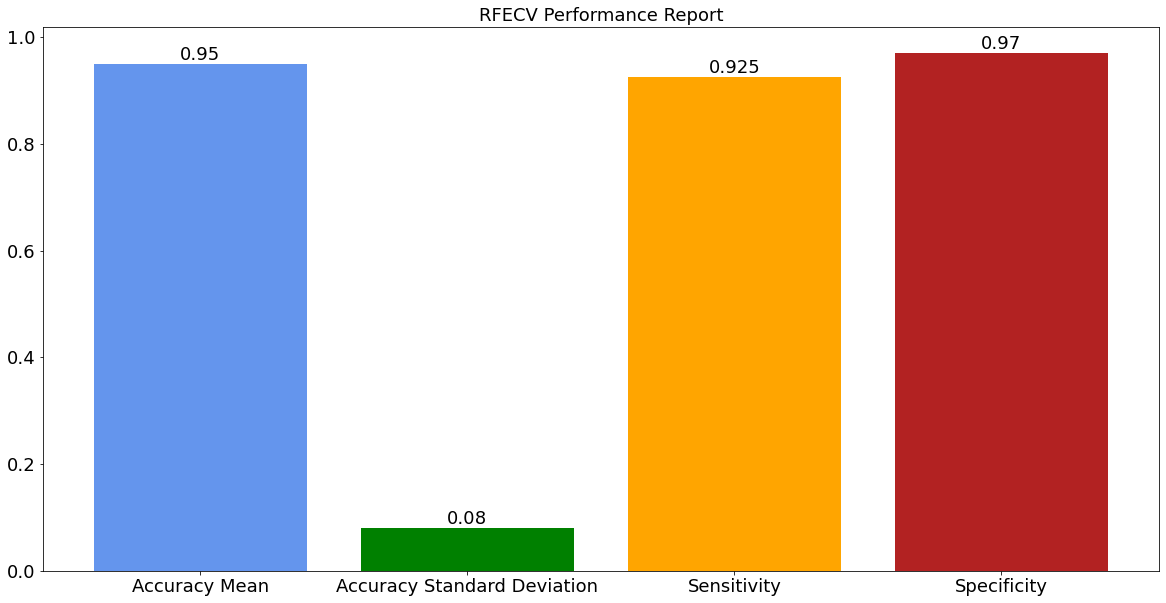

In [11]:
plt.figure(figsize=(20, 10))

accuracy_with_rfecv_mean = (mean(accuracy_with_rfecv))

accuracy_with_rfecv_std = (std(accuracy_with_rfecv))

accuracy_with_rfecv_mean = round(accuracy_with_rfecv_mean,3)

accuracy_with_rfecv_std = round(accuracy_with_rfecv_std,2)

x_com = ("Accuracy Mean", "Accuracy Standard Deviation", "Sensitivity", "Specificity")
y_com = [accuracy_with_rfecv_mean, accuracy_with_rfecv_std, sensitivity_with_rfecv, specificity_with_rfecv]

plt.bar(x_com, y_com, color=["cornflowerblue","g", "orange", "firebrick"])

plt.tick_params(labelsize=18)

plt.title("RFECV Performance Report", fontsize=18)

for a,b in zip(range(len(x_com)),y_com):
    plt.text(a,b,'%s' % b,ha = 'center',va = 'bottom',fontsize=18)
    
plt.show()

## Embedded Methods: L1 Regularization

In [12]:
#print(X.shape)

lsvc = LinearSVC(C=1, penalty="l1", dual=False, max_iter = 10000).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_l1 = model.transform(X) # Removes the unnecessary features from Original X

#print(X_l1.shape)

y_true, y_pred = list(), list()

kf = KFold(n_splits=18, random_state=None, shuffle=False) # For Cross Validation

model = SVC(kernel='linear', C=1, random_state=40) # Declaring Model

#specificity = make_scorer(recall_score, pos_label=0)

#specificity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring=specificity)

print("Individual Subjects' Performance Report")

i = 0
TP = 0
FP = 0
TN = 0
FN = 0

for train_index, test_index in kf.split(X_l1):
    

    X_train, X_test = X_l1[train_index], X_l1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    
    model.fit(X_train, y_train)
    result = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(result)
    
    
    print("\nSubject No : ", i+1)
    
    #print(classification_report(y_test, result, target_names=None))

    print("Accuracy", metrics.accuracy_score(y_test, result))
    
    #print("Sensitivity for Subject is", metrics.recall_score(y_test, result))
    
    #print("Specificity for Subject is", specificity_with_no_feature_selection[i],"\n") 
    
    for j in range(len(y_test)):
        
        if y_test[j] == result[j] == 1:
            TP += 1
        
        if result[j]==1 and y_test[j]!=result[j]:
            FP += 1
        
        if y_test[j]==result[j]==0:
            TN += 1
        
        if result[j]==0 and y_test[j]!=result[j]:
            FN += 1
    
    
    
    
    i=i+1
    
#print(y_true)
#print(y_pred)

    
accuracy_with_l1 = cross_val_score(model, X_l1, y, cv = kf, scoring='accuracy')

#sensitivity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring='recall')

#print(accuracy,"\n")
#print(sensitivity,"\n")
#print(specificity,"\n")

    
# report performance

print("\n\nOverall Performance Report \n")
print('Accuracy Mean:', (mean(accuracy_with_l1)))
print('Accuracy Standard Deviation:', (std(accuracy_with_l1)), '\n')

#print('Sensitivity Mean:', (mean(sensitivity_with_no_feature_selection)))
#print('Sensitivity Standard Deviation:', (std(sensitivity_with_no_feature_selection)), '\n')

#print('Specificity Mean:', (mean(specificity_with_no_feature_selection)))
#print('Specificity Standard Deviation:', (std(specificity_with_no_feature_selection)), '\n')

sensitivity_with_l1 = TP / (TP + FN)

print('Sensitivity:', sensitivity_with_l1)

specificity_with_l1 = TN / (TN + FP)

print('Specificity:', specificity_with_l1)



Individual Subjects' Performance Report

Subject No :  1
Accuracy 0.9

Subject No :  2
Accuracy 1.0

Subject No :  3
Accuracy 1.0

Subject No :  4
Accuracy 1.0

Subject No :  5
Accuracy 1.0

Subject No :  6
Accuracy 1.0

Subject No :  7
Accuracy 1.0

Subject No :  8
Accuracy 0.8

Subject No :  9
Accuracy 1.0

Subject No :  10
Accuracy 1.0

Subject No :  11
Accuracy 1.0

Subject No :  12
Accuracy 0.8

Subject No :  13
Accuracy 0.9

Subject No :  14
Accuracy 1.0

Subject No :  15
Accuracy 1.0

Subject No :  16
Accuracy 1.0

Subject No :  17
Accuracy 1.0

Subject No :  18
Accuracy 1.0


Overall Performance Report 

Accuracy Mean: 0.9666666666666666
Accuracy Standard Deviation: 0.06666666666666665 

Sensitivity: 0.9625
Specificity: 0.97


## Embedded Methods: L2 Regularization


In [13]:
#print(X.shape)

lsvc = LinearSVC(C=1, penalty="l2", dual=False, max_iter = 100).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_l2 = model.transform(X) # Removes the unnecessary features from Original X

#print(X_l2.shape)

y_true, y_pred = list(), list()

kf = KFold(n_splits=18, random_state=None, shuffle=False) # For Cross Validation

model = SVC(kernel='linear', C=1, random_state=40) # Declaring Model

#specificity = make_scorer(recall_score, pos_label=0)

#specificity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring=specificity)

print("Individual Subjects' Performance Report")

i = 0
TP = 0
FP = 0
TN = 0
FN = 0

for train_index, test_index in kf.split(X_l2):
    

    X_train, X_test = X_l2[train_index], X_l2[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    
    model.fit(X_train, y_train)
    result = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(result)
    
    
    print("\nSubject No : ", i+1)
    
    #print(classification_report(y_test, result, target_names=None))

    print("Accuracy", metrics.accuracy_score(y_test, result))
    
    #print("Sensitivity for Subject is", metrics.recall_score(y_test, result))
    
    #print("Specificity for Subject is", specificity_with_no_feature_selection[i],"\n") 
    
    for j in range(len(y_test)):
        
        if y_test[j] == result[j] == 1:
            TP += 1
        
        if result[j]==1 and y_test[j]!=result[j]:
            FP += 1
        
        if y_test[j]==result[j]==0:
            TN += 1
        
        if result[j]==0 and y_test[j]!=result[j]:
            FN += 1
    
    
    
    
    i=i+1
    
#print(y_true)
#print(y_pred)

    
accuracy_with_l2 = cross_val_score(model, X_l2, y, cv = kf, scoring='accuracy')

#sensitivity_with_no_feature_selection = cross_val_score(model, X, y, cv = kf, scoring='recall')

#print(accuracy,"\n")
#print(sensitivity,"\n")
#print(specificity,"\n")

    
# report performance

print("\n\nOverall Performance Report \n")
print('Accuracy Mean:', (mean(accuracy_with_l2)))
print('Accuracy Standard Deviation:', (std(accuracy_with_l2)), '\n')

#print('Sensitivity Mean:', (mean(sensitivity_with_no_feature_selection)))
#print('Sensitivity Standard Deviation:', (std(sensitivity_with_no_feature_selection)), '\n')

#print('Specificity Mean:', (mean(specificity_with_no_feature_selection)))
#print('Specificity Standard Deviation:', (std(specificity_with_no_feature_selection)), '\n')

sensitivity_with_l2 = TP / (TP + FN)

print('Sensitivity:', sensitivity_with_l2)

specificity_with_l2 = TN / (TN + FP)

print('Specificity:', specificity_with_l2)



Individual Subjects' Performance Report

Subject No :  1
Accuracy 0.9

Subject No :  2
Accuracy 1.0

Subject No :  3
Accuracy 1.0

Subject No :  4
Accuracy 1.0

Subject No :  5
Accuracy 1.0

Subject No :  6
Accuracy 1.0

Subject No :  7
Accuracy 1.0

Subject No :  8
Accuracy 1.0

Subject No :  9
Accuracy 1.0

Subject No :  10
Accuracy 1.0

Subject No :  11
Accuracy 1.0

Subject No :  12
Accuracy 1.0

Subject No :  13
Accuracy 1.0

Subject No :  14
Accuracy 1.0

Subject No :  15
Accuracy 1.0

Subject No :  16
Accuracy 1.0

Subject No :  17
Accuracy 0.9

Subject No :  18
Accuracy 1.0


Overall Performance Report 

Accuracy Mean: 0.9888888888888889
Accuracy Standard Deviation: 0.03142696805273544 

Sensitivity: 0.9875
Specificity: 0.99


## Performance Comparison Between L1 and L2

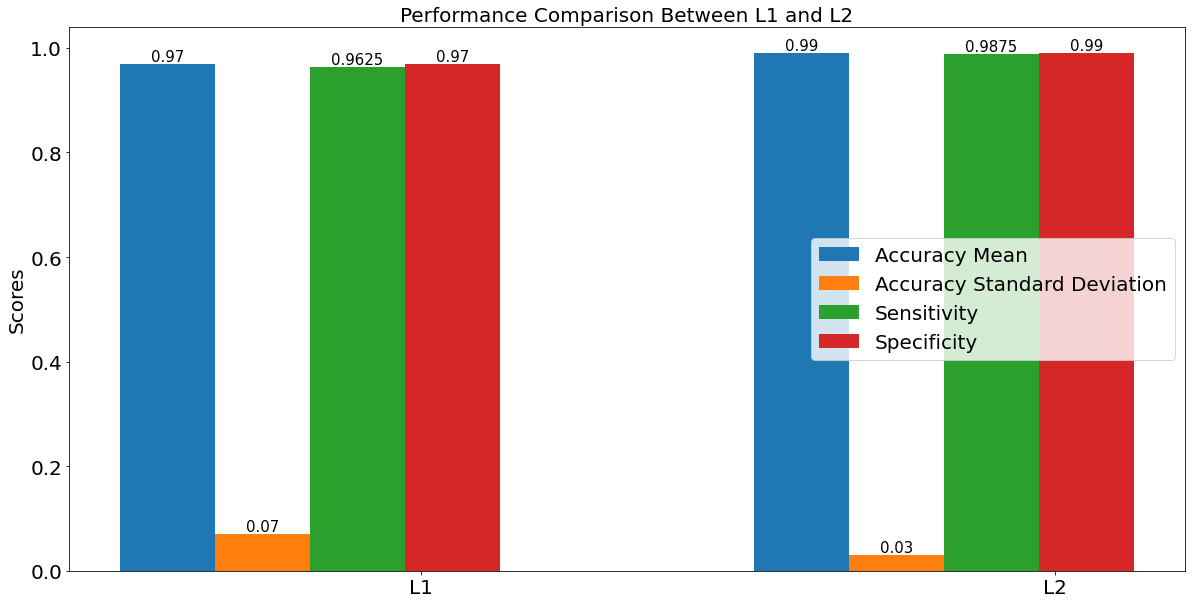

In [14]:
accuracy_mean_list = [round((mean(accuracy_with_l1)),2), round((mean(accuracy_with_l2)),2)]
accuracy_std_list = [round((std(accuracy_with_l1)),2), round((std(accuracy_with_l2)),2)]
sensitivity_list = [sensitivity_with_l1, sensitivity_with_l2]
specificty_list = [specificity_with_l1, specificity_with_l2]

y_data = [accuracy_mean_list, accuracy_std_list, sensitivity_list, specificty_list]

data_label = ["Accuracy Mean", "Accuracy Standard Deviation", "Sensitivity", "Specificity"]

plt.figure(figsize=(20, 10))


for i in range(4):
    plt.bar(np.array([1,2])+i*0.15, y_data[i], width=0.15, label=data_label[i])
    for a,b in zip(np.array([1,2,3,4]),y_data[i]):
        plt.text(a+i*0.15,b,'%s' % b,ha = 'center',va = 'bottom',fontsize=15)


# for a,b in zip(range(len(x_range_com)),y_range_com):
#     plt.text(a,b,'%s' % b,ha = 'center',va = 'bottom',fontsize=18)
        
plt.legend(loc=5, fontsize=20)

plt.title("Performance Comparison Between L1 and L2", fontsize=20)

plt.xticks((1.4,2.4),("L1","L2"))

plt.ylabel("Scores", fontsize = 20)

plt.tick_params(labelsize=20)

plt.show()

## Overall Performance Comparison Chart

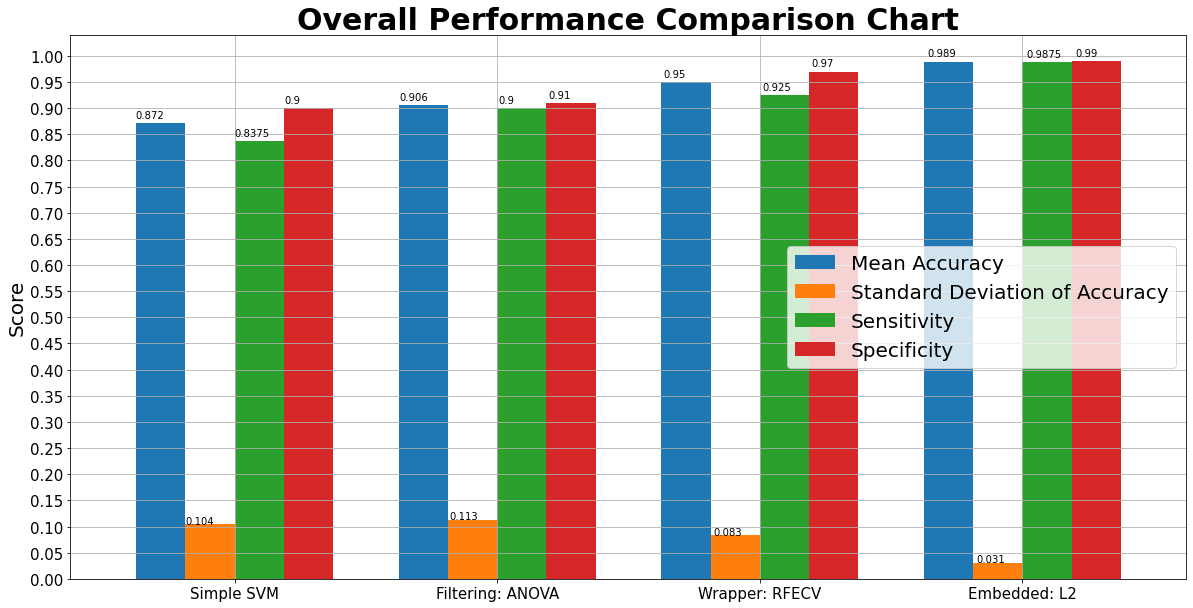

In [15]:
# Declaration 
mean_accuracy = []
standard_deviation_accuracy = []
sensitivity = []
specificity = []

# Assignment
mean_accuracy.append(round(mean(accuracy_with_no_feature_selection),3))

mean_accuracy.append(round(mean(accuracy_with_anova),3))

mean_accuracy.append(round(mean(accuracy_with_rfecv),3))

mean_accuracy.append(round(mean(accuracy_with_l2),3))

standard_deviation_accuracy.append(round(std(accuracy_with_no_feature_selection),3))

standard_deviation_accuracy.append(round(std(accuracy_with_anova),3))

standard_deviation_accuracy.append(round(std(accuracy_with_rfecv),3))

standard_deviation_accuracy.append(round(std(accuracy_with_l2),3))

sensitivity.append(sensitivity_with_no_feature_selection)

sensitivity.append(sensitivity_with_anova)

sensitivity.append(sensitivity_with_rfecv)

sensitivity.append(sensitivity_with_l2)

specificity.append(specificity_with_no_feature_selection)

specificity.append(specificity_with_anova)

specificity.append(specificity_with_rfecv)

specificity.append(specificity_with_l2)

# Converting into Dataframe
data={'Mean Accuracy' : mean_accuracy, 'Standard Deviation of Accuracy' : standard_deviation_accuracy, 
      'Sensitivity' : sensitivity, 'Specificity' : specificity }

#df = pd.DataFrame(data)

df = pd.DataFrame(data, index=['Simple SVM', 'Filtering: ANOVA', 'Wrapper: RFECV', 'Embedded: L2'])

#print(df)


# Plotting
ax = df.plot(kind = 'bar',figsize = (20,10), fontsize=15, width=0.75)

ax.set_yticks(np.arange(0, 1.05, step=0.05))

ax.tick_params(axis='x', labelrotation=0)

ax.legend(loc=5, fontsize = 20)

ax.set_title('Overall Performance Comparison Chart',fontweight="bold", size=30) # Title

ax.set_ylabel('Score', fontsize=20)

ax.grid()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.010))


y_first_window = [mean_accuracy, standard_deviation_accuracy, sensitivity, specificity]


plt.gcf().set_size_inches(20, 10) 

plt.show()

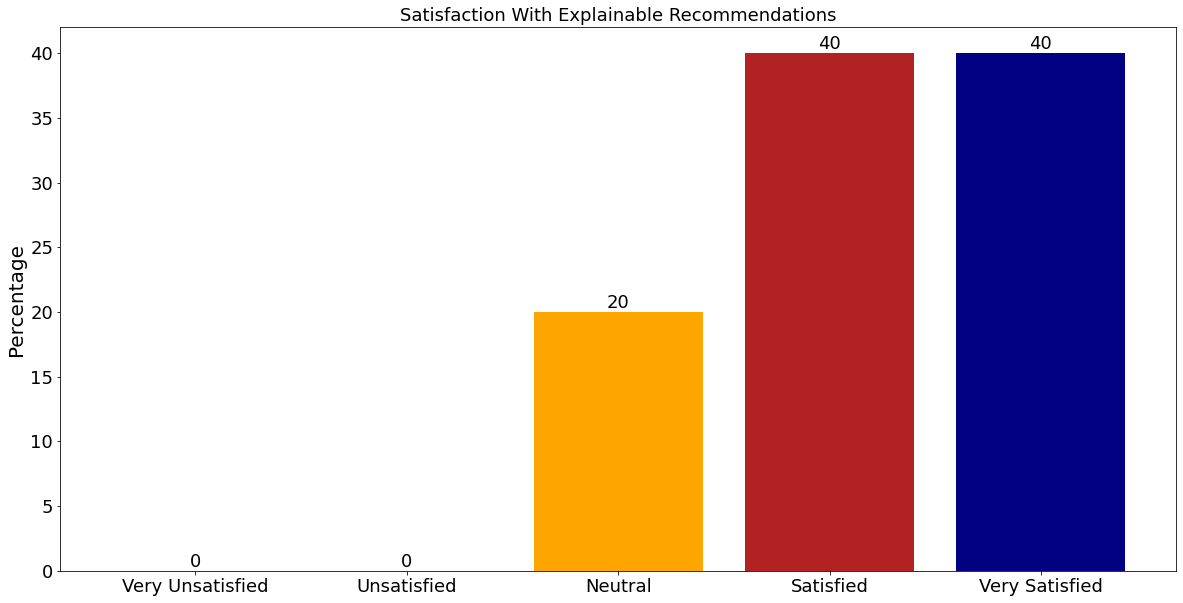

In [29]:
plt.figure(figsize=(20, 10))

very_unsatisfied = 0
unsatisfied = 0
neutral = 20
satisfied = 40
very_satisfied = 40

x_com = ("Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied")
y_com = [very_unsatisfied, unsatisfied, neutral, satisfied, very_satisfied]

plt.bar(x_com, y_com, color=["cornflowerblue","g", "orange", "firebrick", "navy"])

plt.tick_params(labelsize=18)

plt.title("Satisfaction With Explainable Recommendations", fontsize=18)

for a,b in zip(range(len(x_com)),y_com):
    plt.text(a,b,'%s' % b,ha = 'center',va = 'bottom',fontsize=18)

plt.ylabel('Percentage', fontsize=20)

plt.show()